# Extract the PSF  some stars in HD158485 field
=====================================================================

- Creation : Friday 2016 June 24th
- Author Sylvie Dagoret-Campagne 
- affiliation : LAL/IN2P3/CNRS

PSF of HD163466 with grating


## 1) Import package

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [71]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [72]:
#photutils.test()

In [73]:
from scipy import stats 
from scipy import ndimage
import os
from datetime import datetime, timedelta

In [74]:
import libMonocamBaseImages           # my tool library written to do that CCD reduction

In [75]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-06-29 13:17:34.539464
fits date format for the analysis :  2016-06-29T13:17:34


## 3) Configuration of the input file

- HD158485_grat_science.fits
- HD159222_grat_science.fits
- HD163466_grat_science.fits


In [76]:
#object_name='HD158485_grat_20'
#object_name='HD159222_grat'
object_name='HD158485_grat'

In [77]:
path='./HD158485_grat'
basefilename='AssScImHD158485_grat_3.fits' # check master bias
filename=os.path.join(path,basefilename)

## 4) Read the images

In [78]:
allimages = []
ccd_chan = ccdproc.CCDData.read(filename, hdu=0,unit='adu') 
allimages.append(ccd_chan)

data=ccd_chan.data

## 5) Shows the images

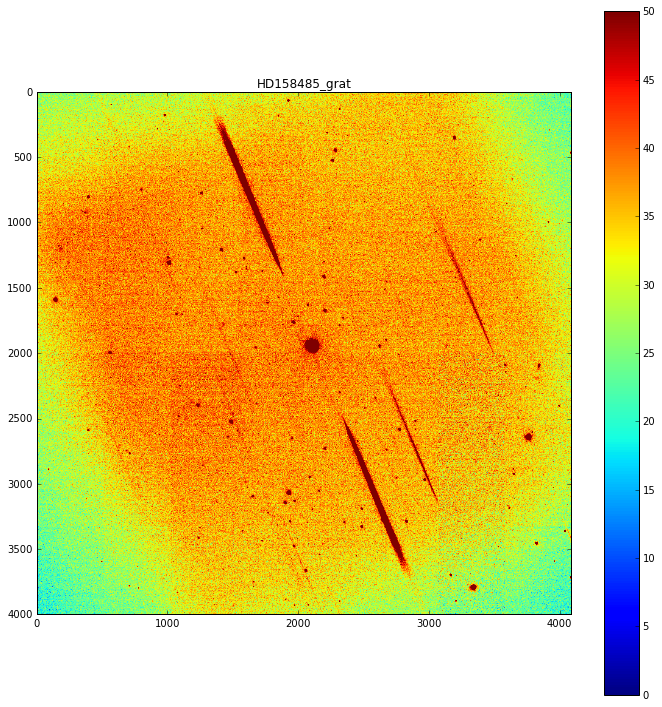

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(ccd_chan,vmin=0,vmax=50.)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)
#plt.savefig(outputfigfilename3)

# 6) Subtract background

code implemented from photutil information there:
https://photutils.readthedocs.io/en/latest/photutils/background.html#

In [80]:
from photutils.background import Background2D
bkg = Background2D(data, (100, 100), filter_size=(3, 3),method='median')

### does the background varies over the field of view ?

In [81]:
print('median background = ',bkg.background_median)
print('median rms = ',bkg.background_rms_median)

('median background = ', 35.86020502418161)
('median rms = ', 3.7021855260458385)


### Radiography of the residual background

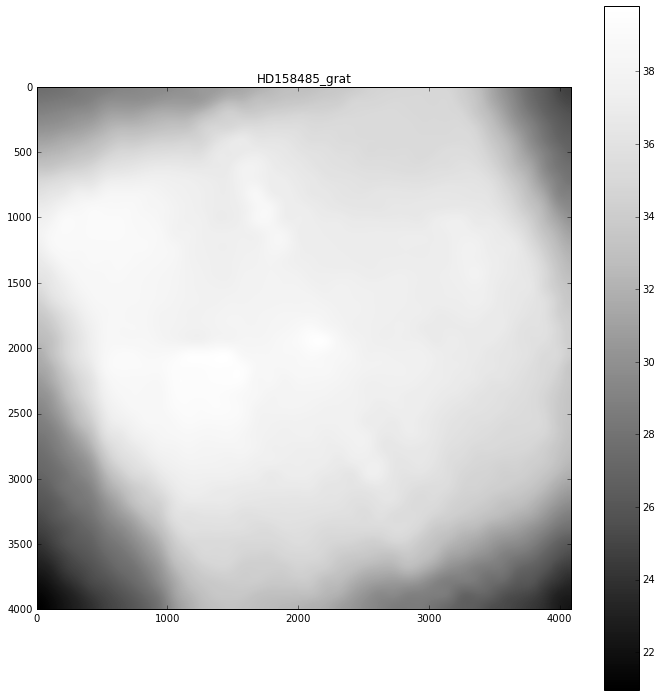

In [82]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=ax.imshow(bkg.background, cmap='Greys_r')
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

### Now subtract residual the background

In [83]:
data2=data - bkg.background

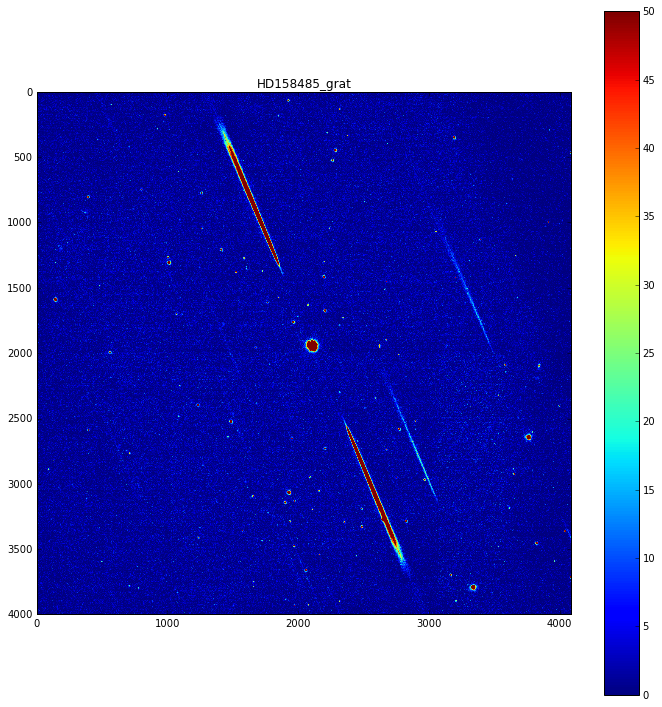

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=plt.imshow(data2, vmin=0,vmax=50.)
#img=plt.imshow(data2)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

## 8.) Compute signal and noise

In [85]:
mean, median, std = sigma_clipped_stats(data2, sigma=10.0, iters=5)    
print(mean, median, std)    

(-0.25037874286316913, -0.39294195208939975, 4.2413695606692174)


In [86]:
sources = daofind(data2 - median, fwhm=3.0, threshold=50.*std)
sources.sort('flux')
print(sources)   

 id   xcentroid     ycentroid   ...      peak          flux           mag       
--- ------------- ------------- ... ------------- ------------- ----------------
  1 3186.80190281 353.620308709 ... 804.342273505 1.08541471334 -0.0889892609063
 18 2639.54387709 3274.71750248 ... 943.262913143 1.10149258072  -0.104953940592
  4 139.315208106 1592.94254398 ... 1205.33071652 1.13216959914  -0.134778722726
  2 2278.35794879 450.510678205 ... 957.898570029 1.25204224787  -0.244047458984
 19 3816.17751354  3455.2429627 ... 823.645064936 1.32828207859  -0.308225782777
  3 1007.13079137  1310.4542908 ... 1402.68267667 1.47797868687  -0.424170428448
 17 1923.89481272 3068.08994462 ... 1758.45057584 1.50155556926  -0.441353522782
 11 2105.12913815 1947.34796286 ... 36283.1784077 2.51991987926   -1.00346683157
 16 1403.30649138 2810.83963935 ... 773.955534758  2.6000386356   -1.03744950368
 14 1703.09184482 2493.24059122 ... 991.266695362 3.66644937733   -1.41061423267
 21 1991.47661756 3825.69213

In [87]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,3186.80190281,353.620308709,0.426554494471,-0.100936638434,-0.0747980296457,25.0,0.0,804.342273505,1.08541471334,-0.0889892609063
18,2639.54387709,3274.71750248,0.404008581439,0.0905624884527,0.206821677551,25.0,0.0,943.262913143,1.10149258072,-0.104953940592
4,139.315208106,1592.94254398,0.354084959166,0.146137329317,0.0441032620838,25.0,0.0,1205.33071652,1.13216959914,-0.134778722726
2,2278.35794879,450.510678205,0.445699126441,-0.0692267337804,-0.0982167305451,25.0,0.0,957.898570029,1.25204224787,-0.244047458984
19,3816.17751354,3455.2429627,0.451066424509,-0.333738723042,-0.460926060287,25.0,0.0,823.645064936,1.32828207859,-0.308225782777
3,1007.13079137,1310.4542908,0.400629119309,-0.104212180839,-0.148137455394,25.0,0.0,1402.68267667,1.47797868687,-0.424170428448
17,1923.89481272,3068.08994462,0.43372305776,-0.1951858048,-0.453556082973,25.0,0.0,1758.45057584,1.50155556926,-0.441353522782
11,2105.12913815,1947.34796286,0.6835530309,-0.171442160558,0.89497864003,25.0,0.0,36283.1784077,2.51991987926,-1.00346683157
16,1403.30649138,2810.83963935,0.95317015464,-0.676213164543,-0.0758671444093,25.0,0.0,773.955534758,2.6000386356,-1.03744950368


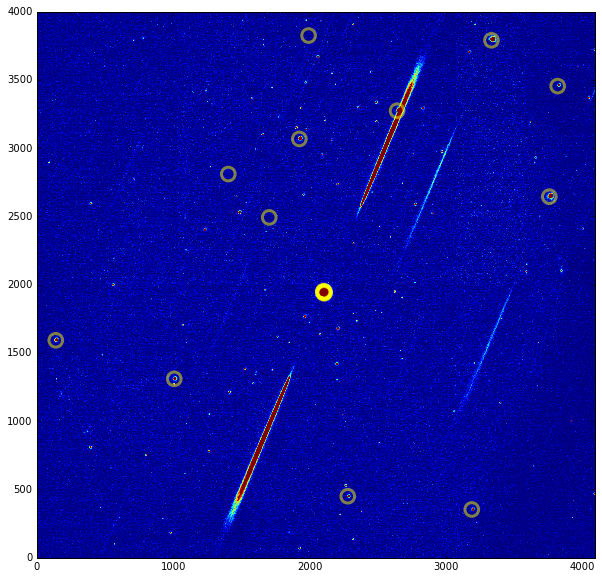

In [88]:
fig, ax = plt.subplots(figsize=(10, 10))
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=50.)
norm = ImageNormalize(stretch=SqrtStretch())
ax.imshow(data2,vmin=0,vmax=50.,origin='lower')
#ax.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='yellow', lw=3., alpha=0.5)

### For example shows the 25 first stars

In [89]:
NBSTARS=25
XX=np.zeros(NBSTARS)
YY=np.zeros(NBSTARS)



selected_stars=sources.as_array()
NBFOUNDSTARS=np.min([NBSTARS,selected_stars.shape[0]])

for istar in range(NBFOUNDSTARS):
    XX[istar] = int(selected_stars[istar][1])
    YY[istar] = int(selected_stars[istar][2])   
    print XX[istar],YY[istar]

3186.0 353.0
2639.0 3274.0
139.0 1592.0
2278.0 450.0
3816.0 3455.0
1007.0 1310.0
1923.0 3068.0
2105.0 1947.0
1403.0 2810.0
1703.0 2493.0
1991.0 3825.0
3755.0 2645.0
3331.0 3790.0
2098.0 1947.0
2107.0 1950.0
2100.0 1953.0
2102.0 1946.0
2100.0 1942.0
2109.0 1943.0
2105.0 1940.0
2105.0 1936.0


## Work with one PSF of one star

In [90]:
# Extract the plot of a PSF
index=0

onepsf=data2[YY[index]-10:YY[index]+10,XX[index]-10:XX[index]+10]
onepsfX=onepsf.sum(axis=0)
onepsfY=onepsf.sum(axis=1)

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


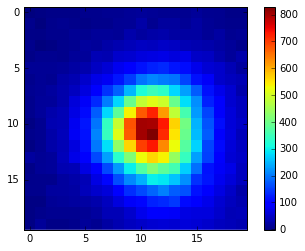

In [91]:
im=plt.imshow(onepsf,interpolation='None')
#im=plt.imshow(onepsf)
plt.colorbar(im)

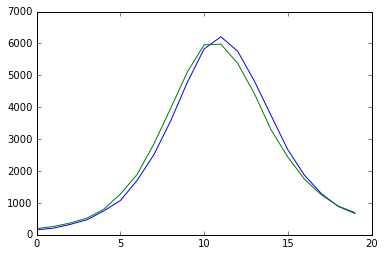

In [92]:
plt.plot(onepsfX)
plt.plot(onepsfY)

In [93]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

In [94]:
DELTA_NBINSX=10
DELTA_NBINSY=10

In [95]:
weighted_avg_and_std(np.arange(onepsfX.shape[0]),onepsfX)

(10.983707372737042, 3.4674099292789005)

In [96]:
weighted_avg_and_std(np.arange(onepsfY.shape[0]),onepsfY)

(10.748620544081611, 3.5445261772327172)

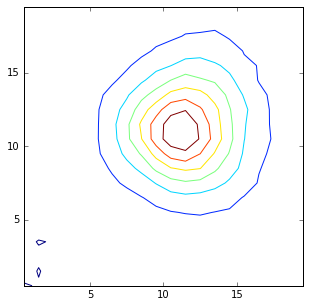

In [97]:
plt.figure(figsize=(5,5))
#onepsf2 = onepsf / np.linalg.norm(onepsf, axis=-1)[:, np.newaxis]
onepsf2 = onepsf / np.sum(onepsf)
levels=np.array([1,0.682,0.75,0.89,0.94,0.96,0.97])
#plt.contour(onepsf2,levels=levels,origin='lower') matmpltlib bug
plt.contour(onepsf2,origin='lower')

In [98]:
XV=np.arange(2*DELTA_NBINSX)-DELTA_NBINSX
YV=np.arange(2*DELTA_NBINSY)-DELTA_NBINSY
Xgrid,Ygrid=np.meshgrid(XV,YV)

In [99]:
weighted_avg_and_std(Xgrid,onepsf2)

(0.98370737273704179, 3.4674099292789)

In [100]:
weighted_avg_and_std(Ygrid,onepsf2)

(0.74862054408160772, 3.5445261772327163)

### Estimation of PRF (PSF) for a bunch of stars


I could not use any of the utilities function.
It lacks of working examples

In [101]:
import photutils.psf 
from photutils.psf import psf_photometry

In [102]:
from astropy.modeling import models, fitting

In [103]:
import photutils
from photutils import psf

photutils.__version__

u'0.3.dev1833'

### Extraction of a few stars for visualization

In [104]:
DELTA_NBINSX=10
DELTA_NBINSY=10

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


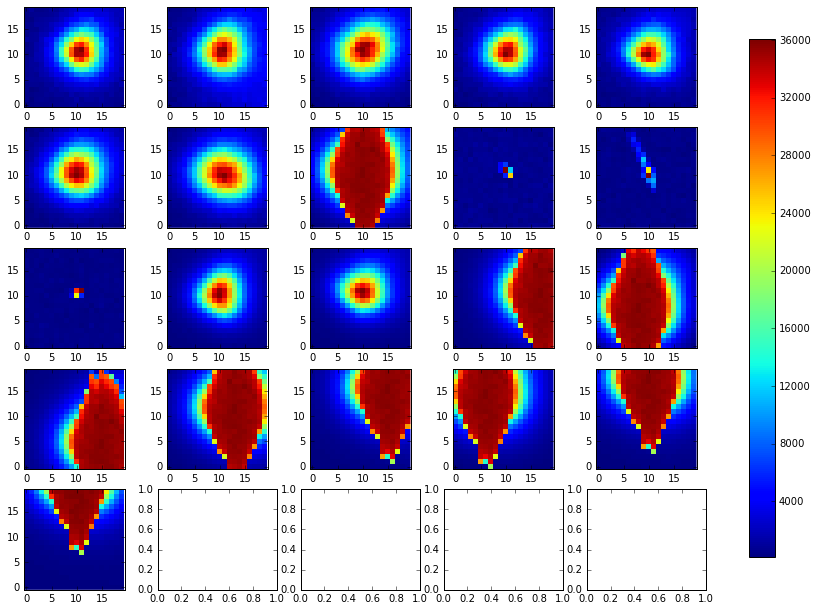

In [105]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(12, 9)
# Plot kernels
for i in range(5):
    for j in range(5):
        index=5*i+j
        if index <NBFOUNDSTARS :
            prf_image = data2[YY[index]-DELTA_NBINSY:YY[index]+DELTA_NBINSY,XX[index]-DELTA_NBINSX:XX[index]+DELTA_NBINSX]
            im = axes[i, j].imshow(prf_image, interpolation='None',origin='lower')
			
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
plt.colorbar(im, cax=cax)
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05)
plt.show()

In [106]:
selected_stars=sources.as_array()

NB_OF_STARS=selected_stars.shape[0]
SIGMAX_OF_STARS=np.zeros(NB_OF_STARS)
SIGMAY_OF_STARS=np.zeros(NB_OF_STARS)
for istar in range(selected_stars.shape[0]):
    XXs = int(selected_stars[istar][1])
    YYs = int(selected_stars[istar][2])   
    star_image = data2[YYs-DELTA_NBINSY:YYs+DELTA_NBINSY,XXs-DELTA_NBINSX:XXs+DELTA_NBINSX]
    thepsf = star_image / np.sum(star_image)
    SIGMAX_OF_STARS[istar]=weighted_avg_and_std(Xgrid,thepsf)[1]
    SIGMAY_OF_STARS[istar]=weighted_avg_and_std(Ygrid,thepsf)[1]

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


In [107]:
SIGMAX_OF_STARS

array([ 3.46740993,  3.92927502,  3.98792872,  3.5676877 ,  3.56193642,
        3.84895412,  4.02168644,  4.11424302,  1.16763274,  1.22218793,
               nan,  3.49598746,  3.6383438 ,  3.37339459,  4.15148473,
        3.67145898,  3.90766867,  3.64653836,  3.98722267,  3.99621048,
        3.60349092])

In [108]:
SIGMAY_OF_STARS

array([ 3.54452618,  4.12891825,  3.81432117,  3.55004576,  3.43693151,
        3.71867851,  3.73954151,  5.12599953,         nan,  2.65759085,
               nan,  3.53633407,  3.41310617,  5.24436762,  5.22831708,
        5.09009454,  5.10916213,  4.64076112,  4.80086552,  4.15442524,
        3.39125172])

#### Cut NAN

In [109]:
all_sigx=SIGMAX_OF_STARS[np.logical_not(np.isnan(SIGMAX_OF_STARS))]
all_sigy=SIGMAY_OF_STARS[np.logical_not(np.isnan(SIGMAY_OF_STARS))]

#### Cut too low values

In [110]:
all_sigx=all_sigx[all_sigx>2.0]
all_sigy=all_sigy[all_sigy>2.0]

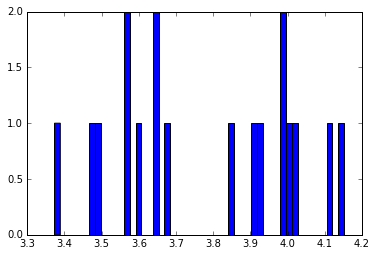

In [111]:
h1=plt.hist(all_sigx,50)

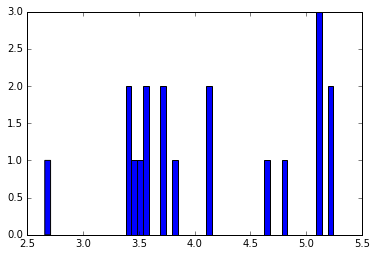

In [112]:
h1=plt.hist(all_sigy,50)

In [113]:
all_sigx.mean()

3.7761623350793903

In [114]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigx.mean(),all_sigx.std(),all_sigx.mean()*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigy.mean(),all_sigy.std(),all_sigy.mean()*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 3.78 +/- 0.24 pixels ==> psf  3.56 +/- 0.21 arcsec 
average prf(y) = 4.12 +/- 0.77 pixels ==> psf  3.89 +/- 0.69 arcsec 


In [115]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigx),all_sigx.std(),np.median(all_sigx)*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigy),all_sigy.std(),np.median(all_sigy)*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 3.76 +/- 0.24 pixels ==> psf  3.55 +/- 0.21 arcsec 
average prf(y) = 3.81 +/- 0.77 pixels ==> psf  3.60 +/- 0.69 arcsec 
